### Импортируем библиотеки, необходимые для выполнения задания:

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import random

plt.style.use('ggplot')

%matplotlib inline

### Сгенерируем выборку объёма 1000 из распределения Хи-квадрат со степенью свободы $k=2$:

In [2]:
chi_2 = sts.chi2(2)

# Сформируем выборку из 1000 элементов для данного распределения
sample = chi_2.rvs(1000)
sample[:20]

array([0.32103436, 2.25039902, 1.58749407, 0.73074535, 0.41327173,
       0.84212063, 1.1567108 , 0.16779129, 0.7731932 , 1.03533834,
       3.32056027, 3.66753097, 0.33656906, 5.01904434, 5.77905099,
       4.62552156, 0.07255634, 0.56162647, 1.85239233, 0.77827395])

### Эмпирическая функция распределения для полученной выборки:

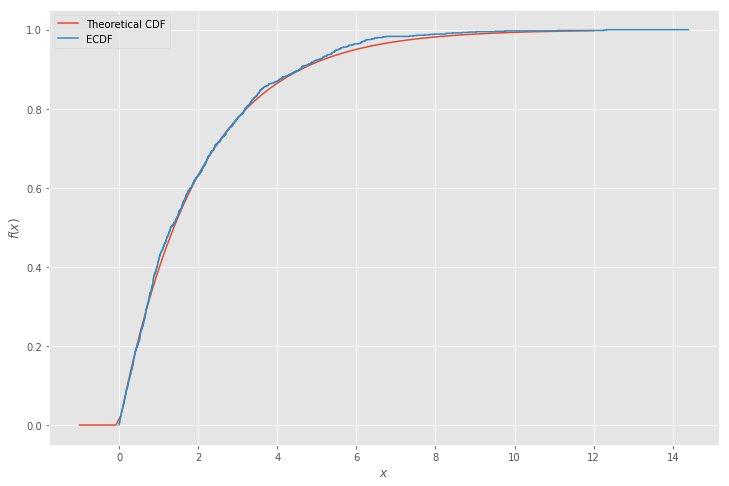

In [3]:
# Теоретическая функция распределения

x = np.linspace(-1,12,100)
cdf = chi_2.cdf(x)
plt.figure(figsize=(12,8))
plt.plot(x, cdf, label='Theoretical CDF')

from statsmodels.distributions.empirical_distribution import ECDF

# Эмпирическая выборочная функция распределения

ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')
plt.show()

### Гистограмма и теоретическая плотность распределения случайной величины X (Хи-квадрат)

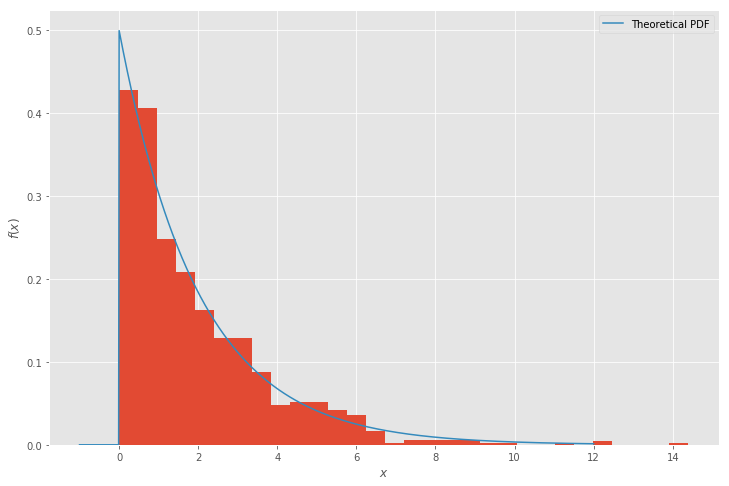

In [4]:
plt.figure(figsize=(12,8))
plt.hist(sample, bins=30, density=True)
x = np.linspace(-1,12,1000)
pdf = chi_2.pdf(x)
plt.plot(x, pdf, label='Theoretical PDF')
plt.legend()
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.show()

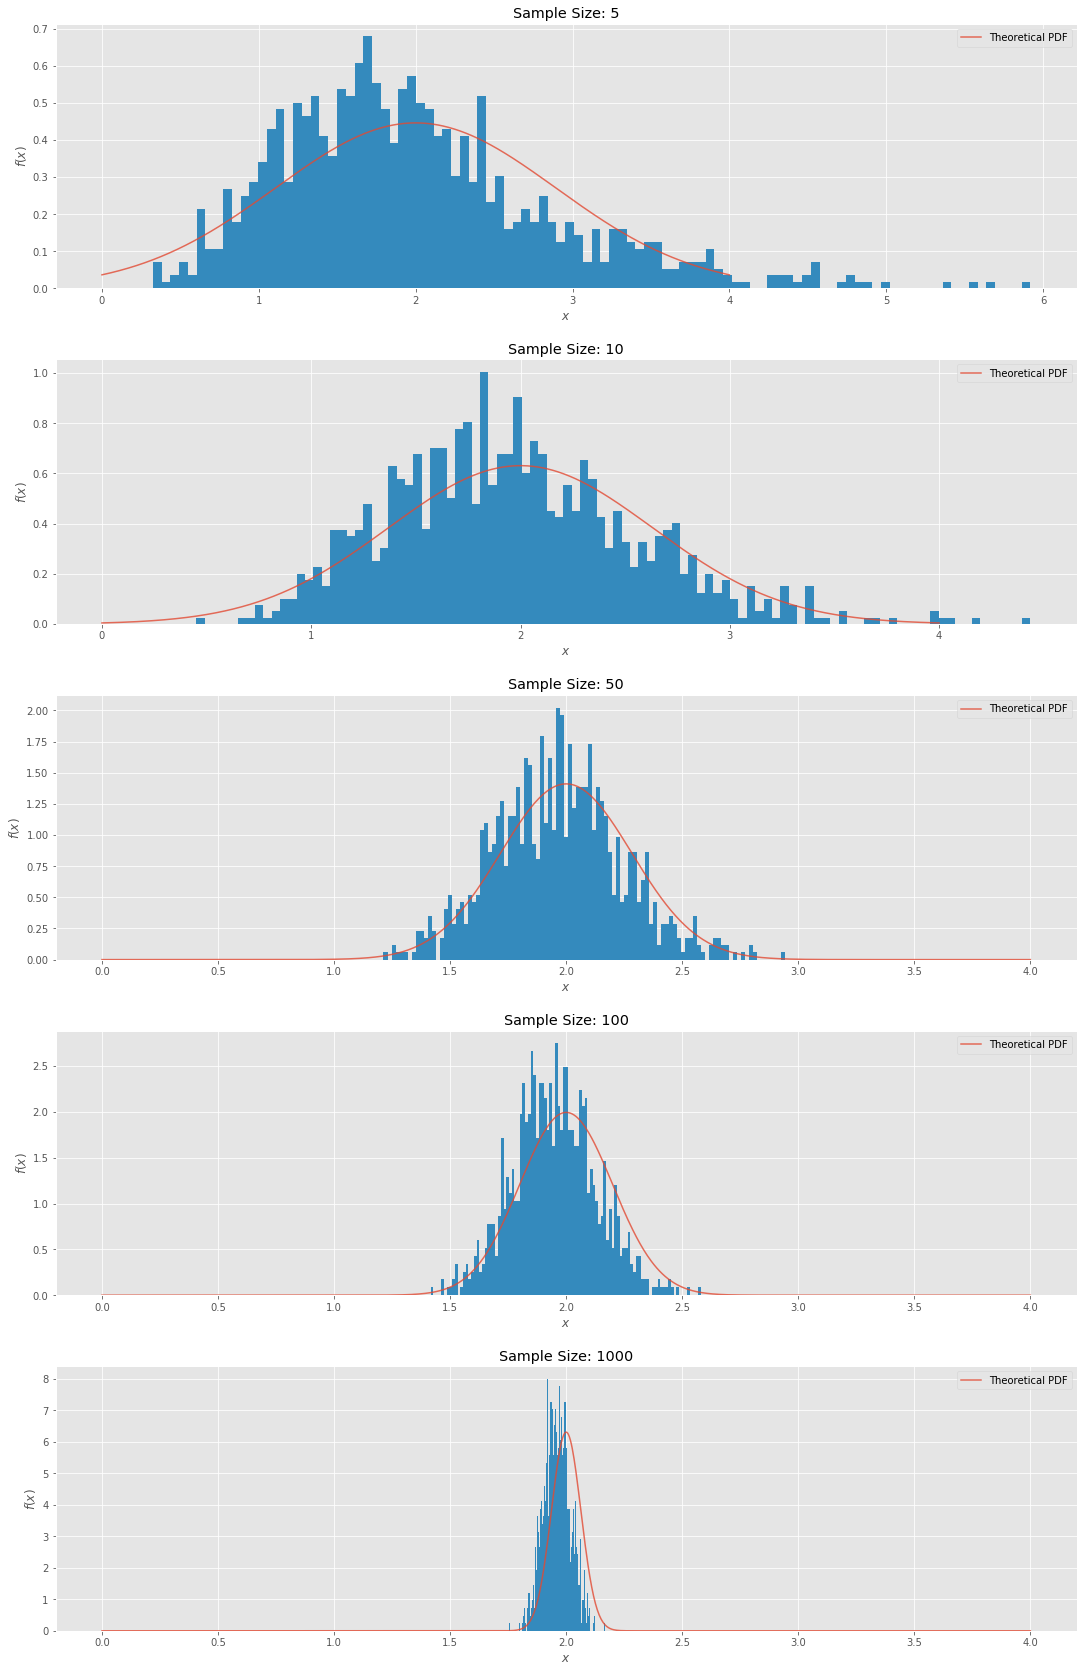

In [6]:
# Хи-квадрат распределение со степенью свободы k=2
chi_2 = sts.chi2(2)

# Выборка 1000 сгенерироанных случайных элементов Хи-квадрат распределения
sample = chi_2.rvs(1000)

# Статистики для Хи-квадрат
k = mean = 2
variance = 2*k

# Матрица для хранения средних значений по выборкам
mean_sample = []
# Количество выборок
numofsample = 1000
# Количество элементов в 1 выборке
sample_size = [5, 10, 50, 100, 1000]

# Расчет стд. отклонения для нормального распределения для данного типа выборки
stddev = [np.sqrt(variance / n) for n in sample_size]

# Для каждого n от [5, 10, 50, 100, 1000]
for size in sample_size:
    # Массив для хранения средних значений каждой выборки
    current_mean_sample = []
    # Для каждой выборки из 1000
    for _ in range(0, numofsample):
        # Выбрать случайные числа размера n 
        rand_samp = random.choices(sample, k=size)
        # Рассчитать матожидание для данной выборки и добавить в массив
        current_mean_sample.append(sum(rand_samp) / len(rand_samp))
    # Пройтись по всем выборкам, посчитать матожидания, пройтись по всем значениям n, и составить матрицу
    mean_sample.append(current_mean_sample)

# Составляем гистограммы и графики плотности соответствующего нормального распределения
    
fig, ax = plt.subplots(5, 1, figsize=(16,24))
fig.tight_layout(pad=5.0)
n = 0

for i in range(0, 5):
        x = np.linspace(0, 4, 1000)
        norm_rv = sts.norm(2, stddev[i])
        pdf = norm_rv.pdf(x)
        
        ax[i].plot(x, pdf, label='Theoretical PDF', alpha=0.8)
        ax[i].legend()
        
        ax[i].hist(mean_sample[n], bins=100, density=True)
        ax[i].set_title(label=f"Sample Size: {str(sample_size[n])}")
        ax[i].set_xlabel('$x$')
        ax[i].set_ylabel('$f(x)$')

        n += 1

plt.show()

### Выводы:

#### С увеличнием n меняется форма распределения для выборочных средних, больше начинает походить на нормальное. Так, на гистограмах мы отображаем график плотности соответствуюшего нормального распрделения $X_n$ ~ $N(k$, $\sqrt{k / n}$), с ростом n также уменьшается дисперсия нормального распределения, что отражено на графиках. 

#### Точность аппроксимации распределения выборочных средних нормальным распределением растет с ростом количества элементов в выборке - $n$. 